<a href="https://colab.research.google.com/github//pawel717-SCGE/lab1/blob/master/lab1-SCGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1>
Szeregi czasowe
</h1>
<h2>
Sprawozdanie z laboratorium
</h2>
</center>

<p style="text-align: right">
    <b><i>Wykonali:</i></b><br>
<i>Paweł Suchanicz</i><br>
<i>Elżbieta Dziedzic</i>
</p>


# LAB 1

## Dane z rozkładu normalnego

### Generowanie danych o rozkładzie normalnym

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

mu = 1.0
sigma = 2.0
sample = np.random.normal(mu, sigma, 10000)

Wygenerowano próbkę z rozkładu normalnego o parametrach μ=1.0 i σ=2.0. Liczebność próbki wynosi 10000.

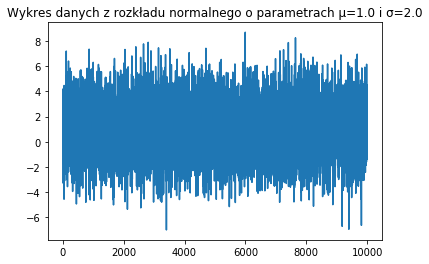

In [2]:
plt.title("Wykres danych z rozkładu normalnego o parametrach μ=1.0 i σ=2.0")
plt.plot(sample)

### Standaryzacja danych

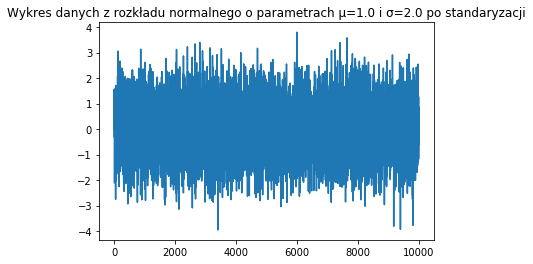

In [3]:
# funkcja do standryzacji próbki
def standarize(sample):
    return (sample - sample.mean())/(sample.std())

sample_standarized = standarize(sample)
plt.title("Wykres danych z rozkładu normalnego o parametrach μ=1.0 i σ=2.0 po standaryzacji")
plt.plot(sample_standarized)

### Tworzenie histogramu

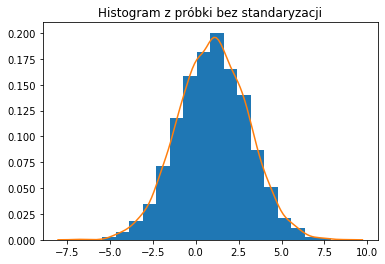

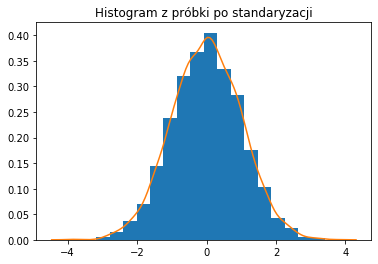

In [4]:
# funkcja do tworzenia histogramu z podnych danych (sample)
def plot_histogram(sample, title=''):
    plt.title(title)
    count, bins, patches = plt.hist(sample, 20, density=True)
    sns.kdeplot(sample)
    plt.show()
    
plot_histogram(sample, "Histogram z próbki bez standaryzacji")
plot_histogram(sample_standarized, "Histogram z próbki po standaryzacji")

### Histogram w skali logarytmicznej

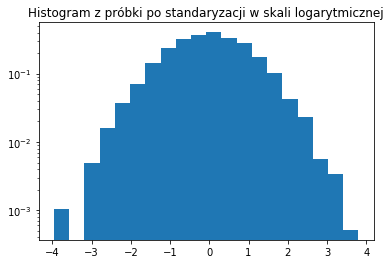

In [5]:
# funkcja do tworzenia histogramu w skali logarytmicznej z podanej próbki (sample)
def plot_log_histogram(sample, title=''):
    plt.title(title)
    plt.yscale('log', nonposy='clip')
    count, bins, patches = plt.hist(sample, 20, density=True)
    plt.show()
    
plot_log_histogram(sample_standarized, 'Histogram z próbki po standaryzacji w skali logarytmicznej')

 ### Dystrybuanta

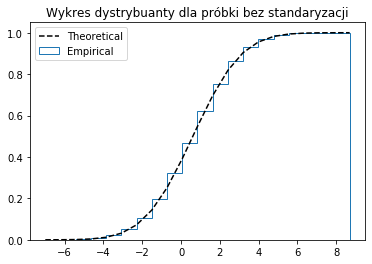

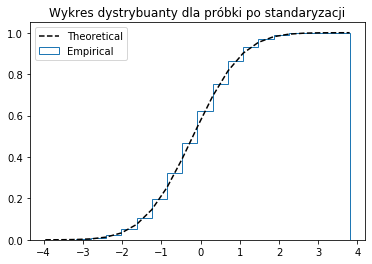

In [6]:
def plot_cumulative_distribution(sample, sigma, mu, title=''):
    count, bins, patches = plt.hist(sample, 20, density=True, cumulative=True,histtype='step', label='Empirical')
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    y = y.cumsum()
    y /= y[-1]
    plt.title(title)
    plt.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')
    plt.legend(loc='upper left')
    plt.show()

plot_cumulative_distribution(sample, sigma=sigma, mu=mu, title="Wykres dystrybuanty dla próbki bez standaryzacji")
plot_cumulative_distribution(sample_standarized, sigma=1.0, mu=0, title="Wykres dystrybuanty dla próbki po standaryzacji")

Na wykresach wartości empiryczne dystrybuanty pokrywają się z teoretycznymi.

### Autokorelacja 

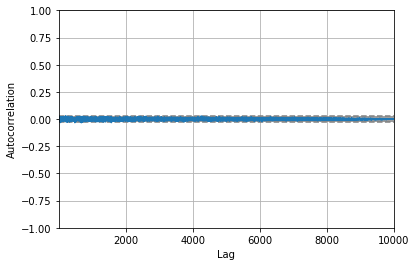

In [7]:
pd.plotting.autocorrelation_plot(sample_standarized)

Używamy wykresu autokorelacji, aby sprawdzić czy w próbce danych występują zależności między danymi dla różnych opóźnień czasowych.

Na wykresie wszystkie autokorelacje wynoszą oscylują bardzo blisko w granicach 0, więc analizowany rozkład jest losowy, dane układają się w sposób przypadkowy.



## Dane Giełdowe

Wczytanie danych giełdowych (notowania S&P500 https://finance.yahoo.com/quote/%5EGSPC/):

In [8]:
import pandas as pd
df_gspc = pd.read_csv('gspc.csv', index_col='Date')
df_gspc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2020-03-31,2614.689941,2641.389893,2571.149902,2584.590088,2584.590088,6568290000
2020-04-01,2498.080078,2522.750000,2447.489990,2470.500000,2470.500000,5947900000
2020-04-02,2458.540039,2533.219971,2455.790039,2526.899902,2526.899902,6454990000


In [9]:
df_gspc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,2.317500e+04
mean,469.547606,472.290218,466.630556,469.646273,469.646273,7.433190e+08
std,695.249673,698.885847,691.282867,695.351962,695.351962,1.451354e+09
min,4.400000,4.400000,4.400000,4.400000,4.400000,0.000000e+00
25%,23.740000,23.740000,23.740000,23.740000,23.740000,1.240000e+06
50%,99.070000,99.839996,98.260002,99.070000,99.070000,1.684000e+07
75%,776.434998,786.259979,770.809998,777.839997,777.839997,4.915400e+08
max,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,1.145623e+10


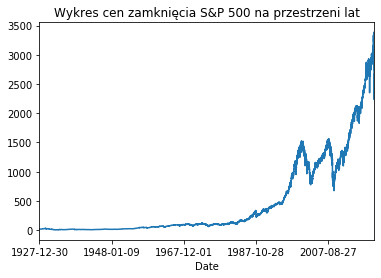

In [10]:
df_close = df_gspc['Adj Close']
df_close.plot(title='Wykres cen zamknięcia S&P 500 na przestrzeni lat')

Z wykresu wnioskujemy, że dane posiadają trend rosnący.

Nastepnie liczymy zwroty jako różnicę obecnej i poprzedniej ceny zamknięcia.

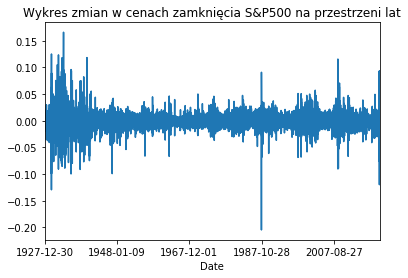

In [11]:
rets = df_close / df_close.shift(1) - 1
rets.plot(title='Wykres zmian w cenach zamknięcia S&P500 na przestrzeni lat')

Wyliczamy także logarytmiczne stopy zwrotu:

In [12]:
df_change = pd.DataFrame(df_close).apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_change.describe()

,Adj Close
count,23174.000000
mean,0.000216
std,0.012006
min,-0.228997
25%,-0.004534
50%,0.000472
75%,0.005372
max,0.153661


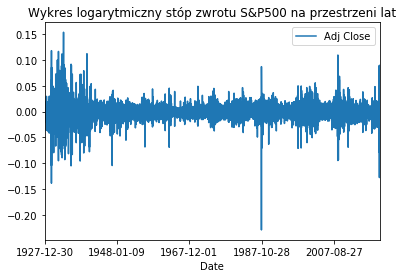

In [13]:
df_change.plot(title='Wykres logarytmiczny stóp zwrotu S&P500 na przestrzeni lat')

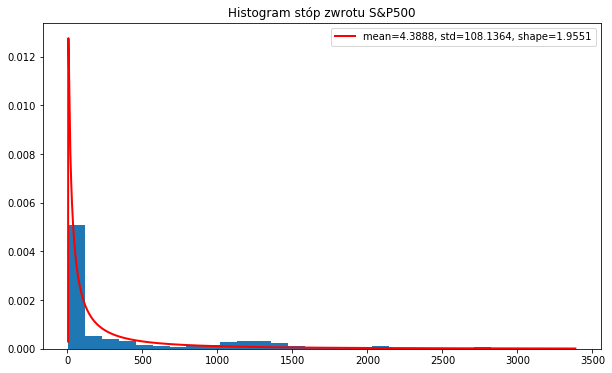

In [14]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(10, 6))


shape, loc, scale = stats.lognorm.fit(df_close) 
x = np.linspace(df_close.min(), df_close.max(), len(df_close))
pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
ax.set_title("Histogram stóp zwrotu S&P500")
ax.hist(df_close, bins=30, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

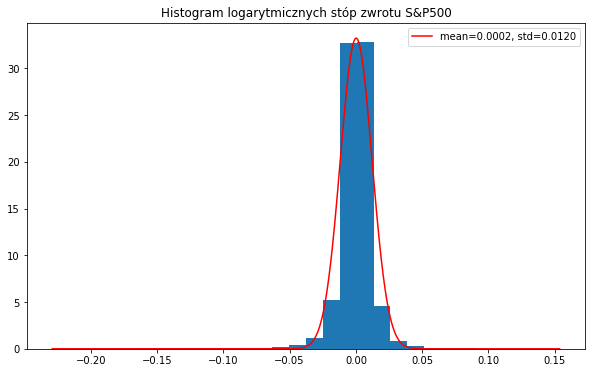

In [15]:
values = df_change['Adj Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Histogram logarytmicznych stóp zwrotu S&P500")
ax.hist(values, bins=30, density=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

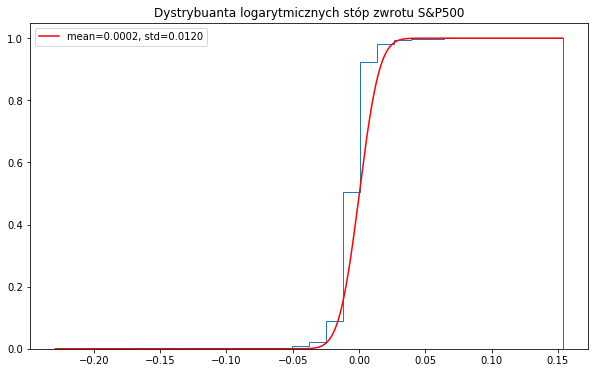

In [16]:
values = df_change['Adj Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Dystrybuanta logarytmicznych stóp zwrotu S&P500")
ax.hist(values, bins=30, density=True, cumulative=True, histtype='step')
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

### Autokorelacja

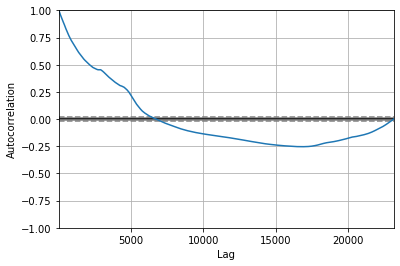

In [17]:
pd.plotting.autocorrelation_plot(df_close);

Z wykresu wynika, że dla danych giełdowych występują zależności. Najsilniejsze autokorelacje znajdują się na początku oraz w okolicy 15000.

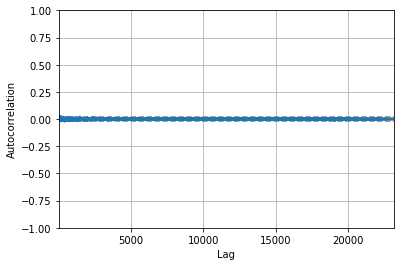

In [18]:
pd.plotting.autocorrelation_plot(rets[1:]);

Autokorelacje na wykresie wynoszą 0. W szeregu z wartościami zwrotu nie są widoczne korelacje.

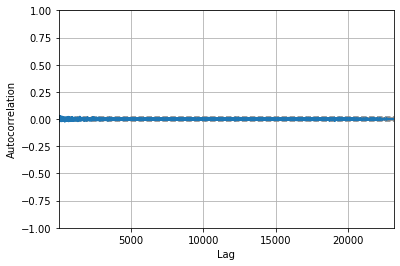

In [19]:
pd.plotting.autocorrelation_plot(df_change['Adj Close'][1:]);

Autokorelacje na wykresie wynoszą 0. Także w szeregu z wartościami logarytmicznymi zwrotu nie są widoczne korelacje.

# LAB 2
## Notowania kryptowalut

Wczytanie danych dotyczących nototwań kryptowaluty Bitcoin(BTC) w stosunku do dolara ameykańskiego(USD):

In [20]:
import pandas as pd
df_btcusd = pd.read_csv('Bitfinex_BTCUSD_1h.csv', index_col='Date')
df_btcusd

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2020-04-01 11-AM,BTCUSD,6310.00,6310.1,6293.4,6294.10,23.41,147569.08
2020-04-01 10-AM,BTCUSD,6315.70,6340.2,6308.9,6310.00,66.12,418085.75
2020-04-01 09-AM,BTCUSD,6328.10,6334.2,6290.7,6315.70,351.88,2218333.79
2020-04-01 08-AM,BTCUSD,6344.49,6345.6,6305.1,6328.10,117.64,743604.16
2020-04-01 07-AM,BTCUSD,6318.20,6355.9,6308.5,6344.49,95.89,607652.91
...,...,...,...,...,...,...,...
2017-10-09 01-PM,BTCUSD,4595.50,4621.0,4585.1,4617.20,1196.97,5515389.68
2017-10-09 12-PM,BTCUSD,4603.00,4610.0,4585.0,4595.50,570.88,2625211.20
2017-10-09 11-AM,BTCUSD,4594.90,4618.0,4594.9,4603.00,738.14,3401164.60


In [21]:
df_btcusd.describe()

,Open,High,Low,Close,Volume BTC,Volume USD
count,21723.000000,21723.000000,21723.000000,21723.000000,21723.000000,2.172300e+04
mean,7768.209977,7815.329199,7718.149434,7768.298101,979.277916,8.063218e+06
std,2711.718758,2743.949160,2675.555842,2711.680826,1439.434039,1.284417e+07
min,3229.800000,3247.100000,3215.200000,3229.800000,0.000000,0.000000e+00
25%,6260.750000,6295.000000,6231.350000,6261.150000,184.335000,1.251194e+06
50%,7526.200000,7560.500000,7489.200000,7526.200000,492.900000,3.340403e+06
75%,9310.720000,9353.950000,9265.900000,9310.720000,1196.930000,9.179411e+06
max,19796.000000,19891.000000,19684.000000,19796.000000,33263.450000,2.541797e+08


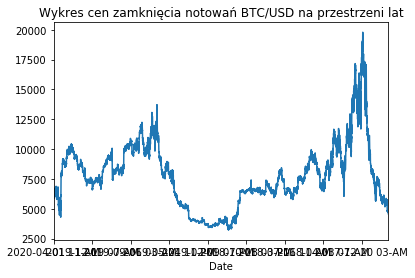

In [22]:
df_btcusd_close = df_btcusd['Close']
df_btcusd_close.plot(title='Wykres cen zamknięcia notowań BTC/USD na przestrzeni lat')

Na wykresie znajduje się kilka lokalnych trendów.

Wyliczamy fluktuacje (zmiany) w cenach zamknięcia notowań jako różnica wartości obecnej i poprzeniego notowania.

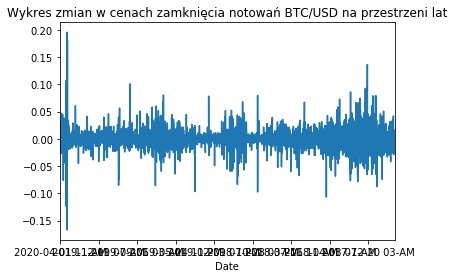

In [23]:
btdusd_rets = df_btcusd_close / df_btcusd_close.shift(1) - 1
btdusd_rets.plot(title='Wykres zmian w cenach zamknięcia notowań BTC/USD na przestrzeni lat')

Wyliczamy także logarytmiczne stopy zwrotu:

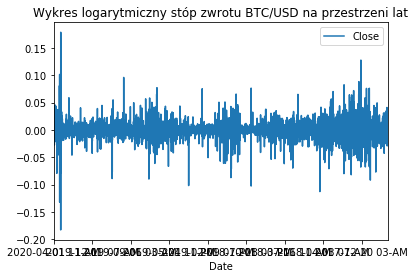

In [24]:
df_btdusd_change = pd.DataFrame(df_btcusd_close).apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_btdusd_change.describe()
df_btdusd_change.plot(title='Wykres logarytmiczny stóp zwrotu BTC/USD na przestrzeni lat')

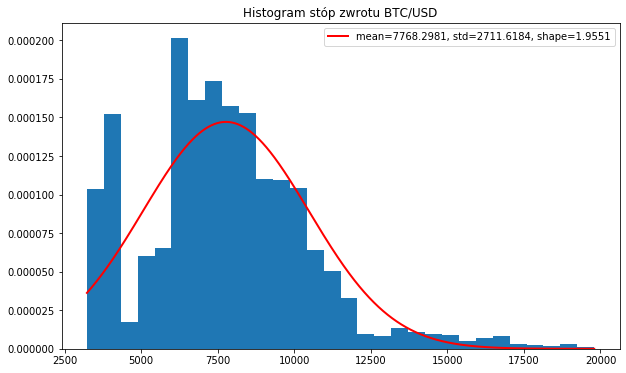

In [25]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(10, 6))


loc, scale = stats.norm.fit(df_btcusd_close) 
x = np.linspace(df_btcusd_close.min(), df_btcusd_close.max(), len(df_btcusd_close))
pdf = stats.norm.pdf(x, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
ax.set_title("Histogram stóp zwrotu BTC/USD")
ax.hist(df_btcusd_close, bins=30, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

Prawa strona histogramu częściowo układa się w sposób zbliżony do rozkładu normalnego, jego lewa strona zupełnie od niego odbiega, występują maksima wykraczające poza rozkład normalny.

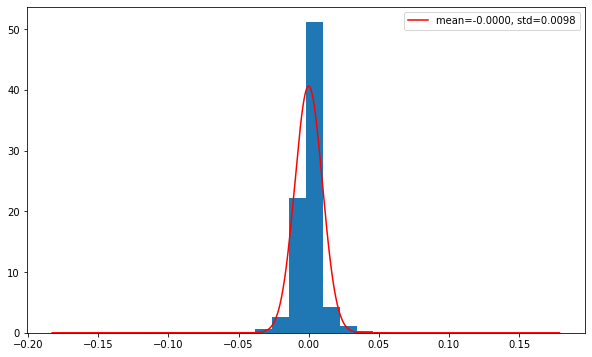

In [26]:
values = df_btdusd_change['Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)
ax.set_title("Histogram loagrytmicznych stóp zwrotu BTC/USD")
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

Histogram jest zbliżony do rozkładu normalnego, jednak bardziej przechylony na prawo i wykraczający poza maksumum rozkładu.

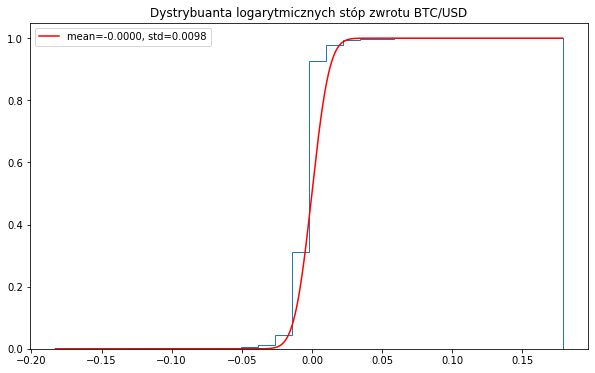

In [27]:
values = df_btdusd_change['Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Dystrybuanta logarytmicznych stóp zwrotu BTC/USD")
ax.hist(values, bins=30, density=True, cumulative=True, histtype='step')
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

Dystrybuanta empiryczna jest zbliżona do teoretycznej. W górnej części wykresu najbardziej od niej odbiega.

### Autokorelacja

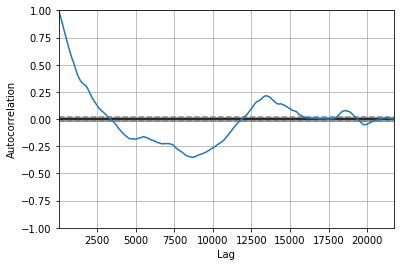

In [28]:
pd.plotting.autocorrelation_plot(df_btcusd['Close'])

Z wykresu autokorelacji wynika, że w szeregu występują zależności. 

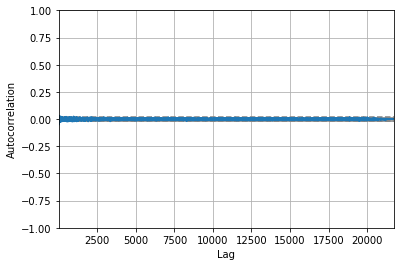

In [29]:
pd.plotting.autocorrelation_plot(df_btdusd_change['Close'][1:])

**Autokorelacja dla wymieszanych danych**

Mieszając dane w sposób losowy usuwamy korelację między danymi, dlatego w wyniku otrzymany wykres autokorelacji jest linią prostą y=0 (autokorelacja wynosi 0)

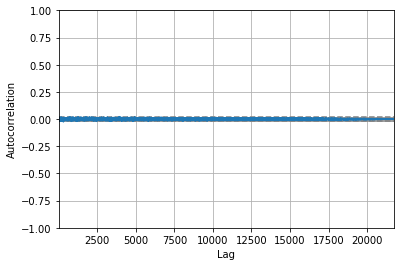

In [30]:
shuffled = sklearn.utils.shuffle(df_btcusd)
pd.plotting.autocorrelation_plot(shuffled['Close'])

## Data-puzzle

Wczytujemy dane z pliku:

In [31]:
import pandas as pd
df_data_puzzle = pd.read_csv('data_puzzle.dat', header=None)
df_data_puzzle

,0
0,12.0
1,12.0
2,3.0
3,0.0
4,0.0
...,...
43490,19.0
43491,16.0
43492,13.0
43493,11.0


In [32]:
df_data_puzzle.describe()

,0
count,43495.000000
mean,86.540016
std,79.702157
min,0.000000
25%,21.000000
50%,65.000000
75%,135.000000
max,503.000000


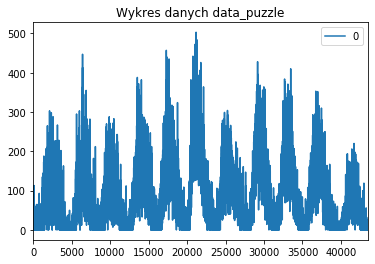

In [33]:
df_data_puzzle.plot(title="Wykres danych data_puzzle")

Dane na wykresie przejawiają sezonowość.

Następnie standaryzujemy dane i wyliczamy stopy zwtotu jako różnicę obecnej wartości i poprzedniej:

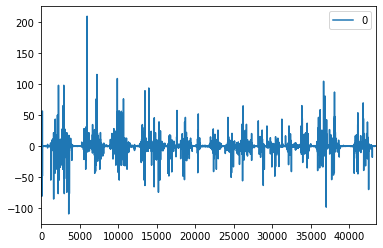

In [34]:
df_data_puzzle = standarize(df_data_puzzle)
data_puzzle_rets = df_data_puzzle / df_data_puzzle.shift(1) - 1
data_puzzle_rets.plot(label='return')

In [35]:
data_puzzle_rets.describe()

,0
count,43494.000000
mean,-0.022364
std,3.646787
min,-108.699455
25%,-0.183849
50%,0.000000
75%,0.149421
max,208.702954


Wyliczamy też logarytmiczne stopy zwrotu:

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


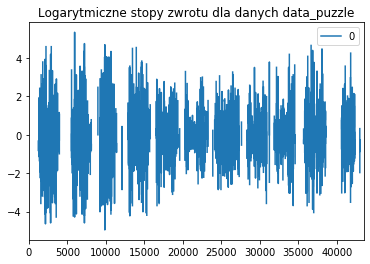

In [36]:
import numpy as np
df_data_puzzle_change = df_data_puzzle.apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_data_puzzle_change.plot(title="Logarytmiczne stopy zwrotu dla danych data_puzzle")

In [ ]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(10, 6))


loc, scale = stats.norm.fit(data_puzzle_rets) 
x = np.linspace(data_puzzle_rets.min(), data_puzzle_rets.max(), len(data_puzzle_rets))
pdf = stats.norm.pdf(x, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
ax.set_title("Histogram stóp zwrotu BTC/USD")
ax.hist(data_puzzle_rets, bins=30, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

Na wykresie pojawiają się skupiska o podobnej szerokości.

In [ ]:
df_data_puzzle_change.describe()

Obliczamy autokorelację dla danych data_puzzle

In [ ]:
pd.plotting.autocorrelation_plot(df_data_puzzle[0])

W szeregu znajdują się zależności. Wykres autokorelacji jest podobny do wykresu drgań oscylatora harmonicznego tłumionego.

# LAB 4
## Transformata Fouriera i widmo mocy

https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/

In [ ]:
import scipy as sp
import scipy.fftpack
data_puzzle_fft = sp.fftpack.fft(df_data_puzzle)

In [ ]:
data_puzzle_psd = np.abs(data_puzzle_fft) ** 2

In [ ]:
plt.plot(data_puzzle_fft)

In [ ]:
plt.plot(data_puzzle_psd)